# Pymaceuticals Inc.
---

### Analysis

- In analyzing the mouse weight and average tumor volume for the Capomulin treatment, it can be seen that the correlation coefficient is approximately 0.8. This correlation coefficient indactes that there is a strong and positive correlation between the two variables. This means that there is a strong chance that as the mouse weight increases, so does the average tumor volume.

- Overall, it can also be seen that the average tumor volume in mice treated with Capomulin is smaller than those treated by other drugs.

- In contrast, Ketapril has the highest average tumor volume as compared to other drugs. This could indicate that this is potentially the least effective treatment, while Capomulin may be the most effective treatment.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/kathryndavis/Downloads/Starter_Code 9/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/kathryndavis/Downloads/Starter_Code 9/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
display(combined_data.head())



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice
num_mice = combined_data["Mouse ID"].nunique()
print(f"The number of mice in the dataset is: {num_mice}")


The number of mice in the dataset is: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice_list = list(duplicate_mice)
print(duplicate_mice_list)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_list)]
display(duplicate_mouse_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
display(clean_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print(f"The number of mice in the clean DataFrame is: {num_mice_clean}")


The number of mice in the clean DataFrame is: 249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume',
                                              'median': 'Median Tumor Volume',
                                              'var': 'Tumor Volume Variance',
                                              'std': 'Tumor Volume Std. Dev.',
                                              'sem': 'Tumor Volume SEM'})
# Assemble the resulting series into a single summary DataFrame.
display(summary_stats)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method to produce the summary statistics in a single line
summary_stats_advanced = clean_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename the columns for clarity
summary_stats_advanced.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Display the summary statistics table
display(summary_stats_advanced)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

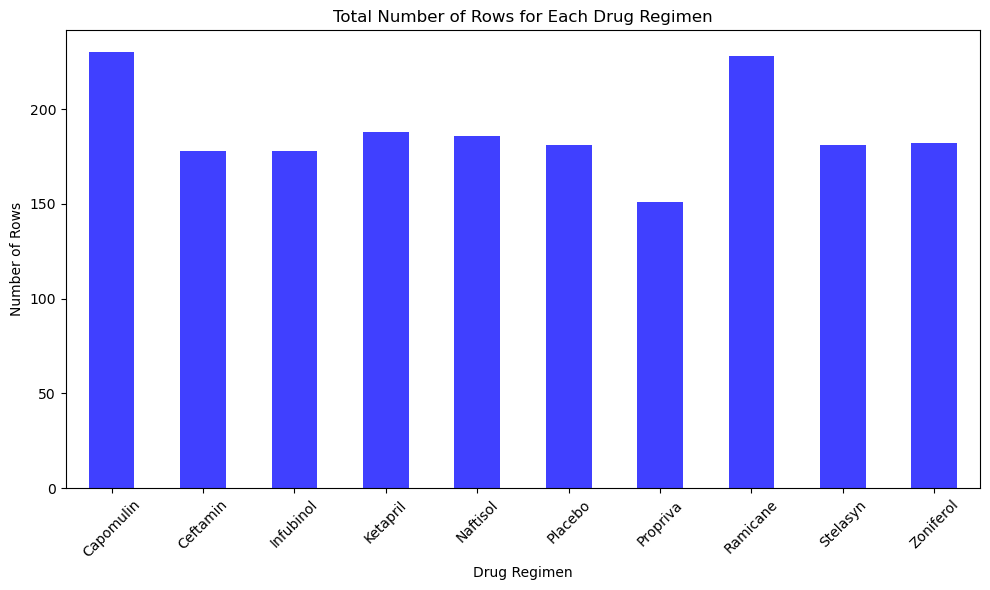

In [19]:
# Group the data by 'Drug Regimen' and count the number of rows for each regimen
bar_data = clean_data.groupby("Drug Regimen").size()

# Plot the bar chart 
bar_data.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.75)

# Add titles and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

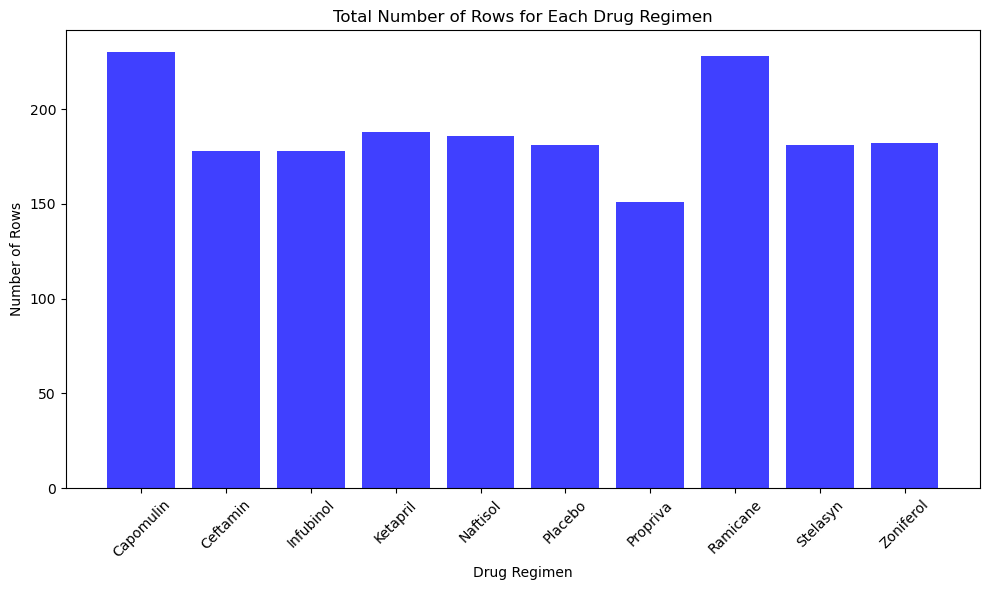

In [10]:
# Group the data by 'Drug Regimen' and count the number of rows for each regimen
bar_data = clean_data.groupby("Drug Regimen").size()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart using pyplot
ax.bar(bar_data.index, bar_data, color='blue', alpha=0.75)

# Add titles and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate the x-axis labels 
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


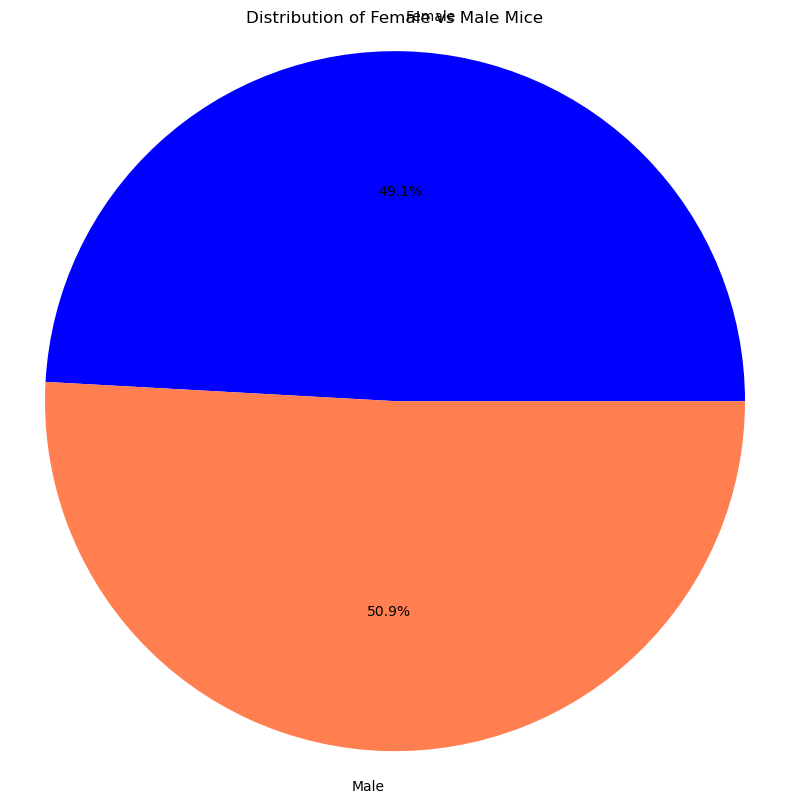

In [11]:
# Group the data by 'Sex' and count the number of mice for each category
pie_data = clean_data.groupby("Sex").size()

# Plot the pie chart using pandas
pie_data.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['blue', 'coral'])

# Add title
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

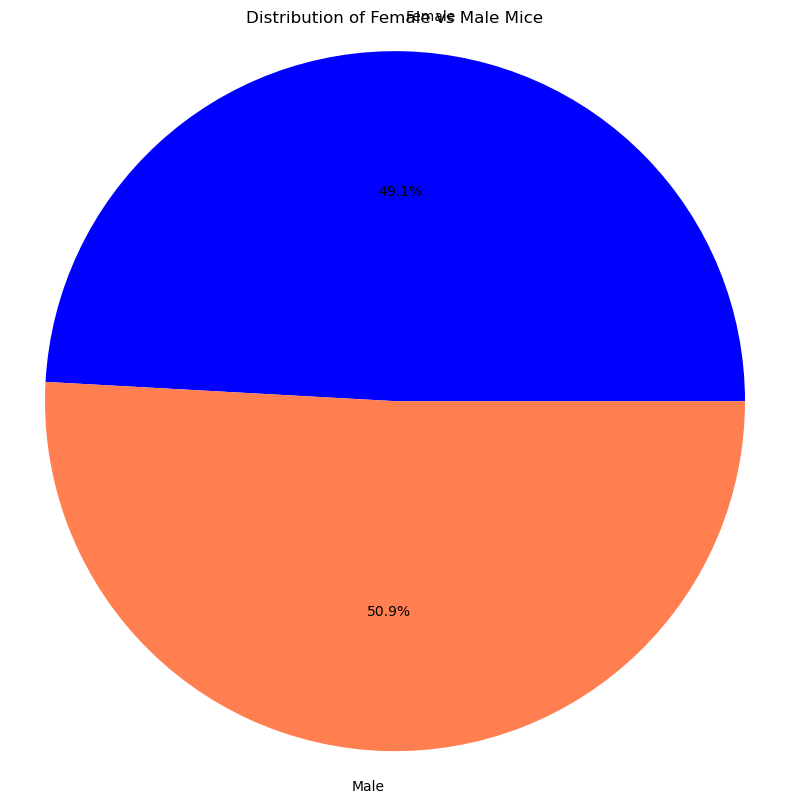

In [12]:
# Group the data by 'Sex' and count the number of mice for each category
pie_data = clean_data.groupby("Sex").size()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pie chart using pyplot
ax.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['blue', 'coral'])

# Add title
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Filter the DataFrame for the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'])

# Display the DataFrame with the final tumor volume of each mouse
display(final_tumor_volume)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter the final_tumor_volume DataFrame for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add tumor volume data to the list
    tumor_volume_data.append(treatment_data)
    
    # Calculate quartiles, IQR, and determine potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"----- {treatment} -----")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}")
    print("\n")


----- Capomulin -----
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


----- Ramicane -----
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


----- Infubinol -----
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64


----- Ceftamin -----
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)




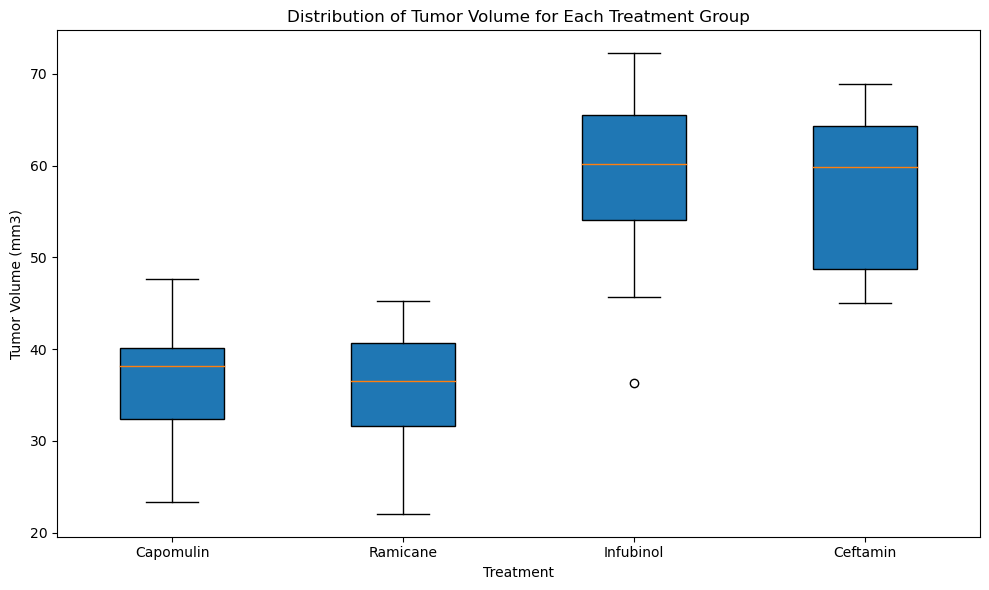

In [15]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the box plot
ax.boxplot(tumor_volume_data, labels=treatments, patch_artist=True)

# Add title and labels
ax.set_title('Distribution of Tumor Volume for Each Treatment Group')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

# Show the plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

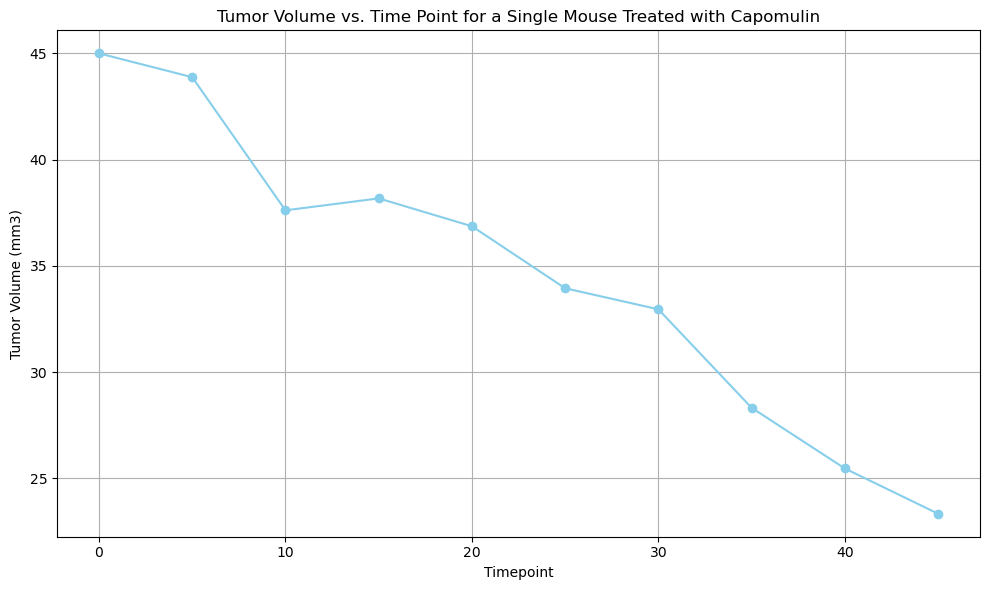

In [16]:
# Filter the clean_data DataFrame for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID treated with Capomulin
mouse_id = 's185'

# Filter the data for the specific mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot the tumor volume vs. time point for the single mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='skyblue', linestyle='-')

# Add title and labels
plt.title('Tumor Volume vs. Time Point for a Single Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


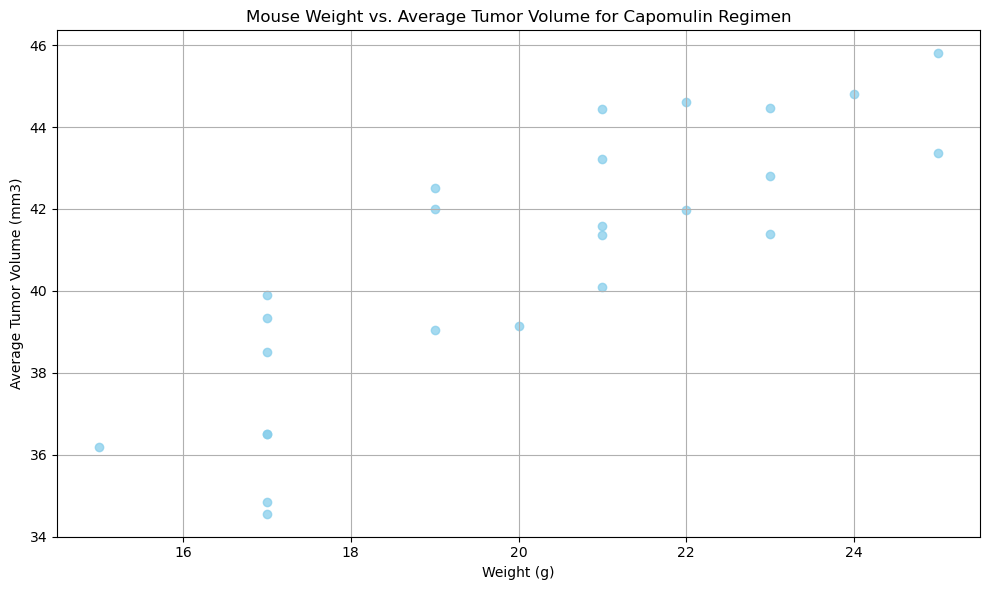

In [17]:
# Group the capomulin_data DataFrame by mouse ID and calculate the average tumor volume and mouse weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Plot a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='skyblue', alpha=0.75)

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.841936342469472


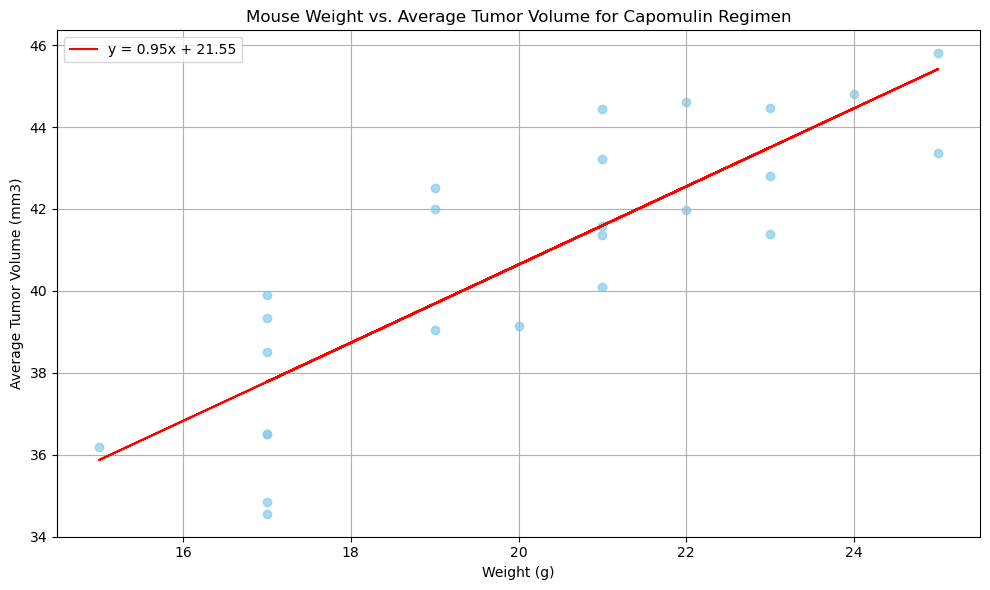

In [18]:
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='skyblue', alpha=0.75)

# Plot the regression line
x_values = np.array(average_data['Weight (g)'])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', linestyle='-', label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
